In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 4s (2,159 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155335 files and d

# 내 생일의 기온변화 그래프 그리기

- 날씨 데이터 읽어오기
- 헤더 부분(제목)을 next() 함수를 사용해 제외
- 내 생일의 최고기온/최저기온 저장 변수 생성

In [ ]:
import csv 

In [ ]:
# csv 파일 읽어오기
# 파일연결
f = open("seoul_weather.csv", encoding="cp949")
data = csv.reader(f)
# 실제로는 불러온게 아니라 하드디스크의 부분을 찍어줌
# 

print(data)       # <_csv.reader object at 0x7f3091e504d0>
print(type(data)) # <class '_csv.reader'>
next(data)        # ['지점명', '일시', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
# next() -> reader에서 밖에 안돼

#print(header, "\n")

<class '_csv.reader'>


['지점명', '일시', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']

['서울', '1907-10-01', '13.5', '7.9', '20.7']

In [ ]:
# 참고 

## "년" 확인 
int('1907-10-01'.split("-")[0])>=2000 # int() 문자 -> 숫자 변경하여 숫자 비교!
# '1907-10-01'.split("-")[0] >=2000 (X) 스트링 함수이기 떄문 !
# '1907-10-01'[5:7] # 슬라이싱

## "월" and "일" 확인
'1907-10-01'.split("-")[1] == "10" and  '1907-10-01'.split("-")[-1] == "01" #-> True/False의 결과값
# df[ (df["aaa"] == 1) & (df["bbb"] != 1)] #-> True/False의 결과값

# int('1907-10-01'.split("-")[0]  년 1907
# int('1907-10-01'.split("-")[1]  월 10
# int('1907-10-01'.split("-")[-1] 일 01

True

In [ ]:
# 참고
row[1][:4]  # 년
row[1][5:7] # 월
row[1][-2]  # 일

'1'

In [ ]:
# 참고 - NaN

['지점명', '일시', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'][-2] != "" # 가져온 데이터("최저기온")가 공백이 아니면 
# 공백이 아닌걸 확인하고 앞으로 다시 가기

True

- 년도별 생일날의 최고기온/최저기온 추출하기
- 추출한 데이터 리스트 변수에 저장하기

In [ ]:
### NaN
max_temp = []
min_temp = []
date_temp = []
# max_temp = []; min_temp = []; date_temp = []

for row in data: # csv.reader에서 1개씩 읽어오기
 # data 열 -> ['지점명', '일시', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
 # NaN 값 확인 (최고/최저 기온 모두 값이 있다면 = NaN값이 아니라면)
 if row[-2] != "" and row[-1] != "" : # row[-2]->최저기온/row[-1]->최고기온
   if int(row[1].split("-")[0]) >= 1973:  # int(row[1].split("-")[0]) -> 년
    if row[1][5:7] == "06" and row[1][-2:] == "13": # row[1][5:7]->월 / row[1][-2:]->일
      max_temp.append(float(row[-1]))         # 최고기온 리스트 추가
      min_temp.append(float(row[-2]))         # 최저기온 리스트 추가
      date_temp.append(row[1].split("-")[0])  #

print(max_temp)

[28.6, 26.3, 27.8, 23.8, 26.3, 29.4, 27.2, 29.1, 28.0, 23.0, 24.3, 34.2, 25.6, 26.0, 26.5, 28.8, 30.1, 29.1, 26.9, 24.0, 24.3, 31.2, 29.1, 29.2, 30.6, 24.1, 29.9, 29.7, 22.5, 24.4, 22.4, 28.6, 31.3, 28.8, 29.3, 27.6, 24.6, 27.2, 26.9, 28.9, 27.5, 25.8, 30.9, 29.6, 25.9, 27.0, 28.8, 33.5, 29.7]


In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_

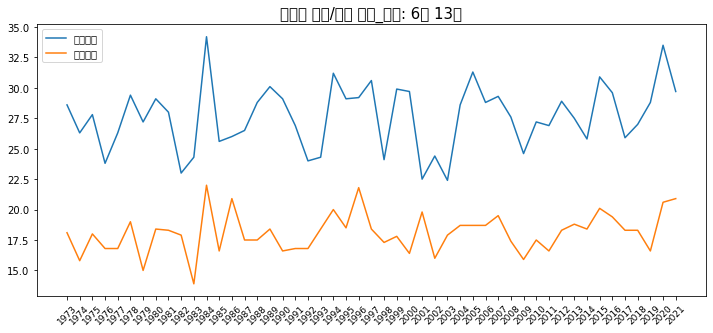

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

plt.figure( figsize = (12, 5))
plt.plot(max_temp, label="최고기온")
plt.plot(min_temp, label="최저기온")

plt.title("생일별 최고/최저 기온_기준: 6월 13일", size = 15)
plt.legend()
plt.xticks(list(range(len(date_temp))), labels=date_temp, rotation=45, size=9)

plt.show()


1. 최고/최저/년도별 생일 저장 리스트 변수
2. data 파일에서 태어난 년도 이후 생일의 "기온" 데이터 가져오기
  - 데이터들 중 NaN 값에 대한 처리 방법 고민 
  - 데이터 형식 모두 텍스트 => int/float으로 수정해야 그래프 생성 가능! 
  -  년도만 가져와 int변경 후 이 값이 태어난 년도보다 크면서 월과 일이 생일과 일치하는지 확인 => 일치하면 데이터(년도, 최저기온, 최고기온) 추가 !
  - 년만 가져오려면? -> 데이터 봐야함 
  - 월만 가져오려면? 
  - 일만 가져오려면?   
3. 시각화
  - matpotlib을 이용한 차트 작성
  - 하나의 차트에 최저/최고 같이 출력

In [ ]:
# 모든 생일날의 최고/최저 온도와 날짜 받아오기
# 


- 그래프 그리기

In [ ]:
# 최고/최저 온도를 출력하는 차트 그리기



##### pandas 모듈 이용

In [ ]:
# pandas 모듈로 파일 읽어오기
import pandas as pd

# pandas 모듈로 파일 읽어오기
df=pd.read_csv("seoul_weather.csv", encoding="cp949")
#print(df.info())

# df에서 "일시" 날짜형 데이터로 변경하기
df["일시"] = pd.to_datetime(df["일시"])
#print(df.dtypes)

df=df.dropna(thresh=3)
df=df.fillna(method='ffill')
#print(df.isna().sum())

# 생일을 기준으로 오늘날짜까지 생일날의 최고/최저 온도 추출하기
bir_df = df[(df["일시"] >= "1973-06-13") & (df["일시"].dt.month == 6) & (df["일시"].dt.day == 13)]
bir_df

,지점명,일시,평균기온(℃),최저기온(℃),최고기온(℃)
23566,서울,1973-06-13,22.4,18.1,28.6
23931,서울,1974-06-13,20.3,15.8,26.3
24296,서울,1975-06-13,22.0,18.0,27.8
24662,서울,1976-06-13,20.1,16.8,23.8
25027,서울,1977-06-13,20.8,16.8,26.3
25392,서울,1978-06-13,23.6,19.0,29.4
25757,서울,1979-06-13,21.5,15.0,27.2
26123,서울,1980-06-13,23.3,18.4,29.1
26488,서울,1981-06-13,22.6,18.3,28.0
26853,서울,1982-06-13,20.5,17.9,23.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_

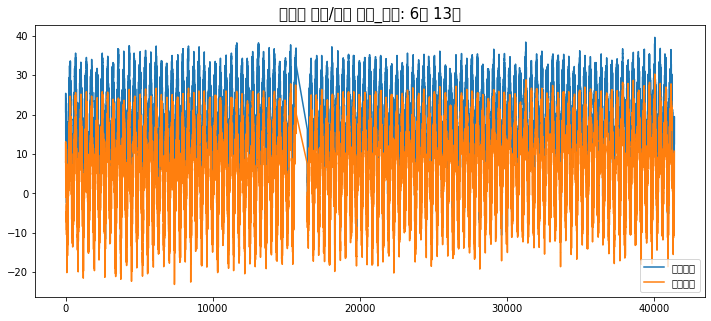

In [ ]:
import matplotlib.pyplot as plt
# df에서 "일시" 날짜형 데이터로 변경하기
plt.rc('font', family='NanumBarunGothic')

plt.figure( figsize = (12, 5))
plt.plot(df["최고기온(℃)"], label="최고기온")
plt.plot(df["최저기온(℃)"], label="최저기온")

date_lst = bir_df["일시"].dt.year

plt.title("생일별 최고/최저 기온_기준: 6월 13일", size = 15)
plt.legend()
#plt.xticks(list(range(len(bir_df))), labels=date_lst, rotation=90, size=9)



In [ ]:
# NaN 값 처리하기


In [ ]:
# 생일을 기준으로 오늘날짜까지 생일날의 최고/최저 온도 추출하기



In [ ]:
# 차트에 출력하기
